In [1]:
from keras.utils import to_categorical 
from keras_preprocessing.image import load_img
from keras.models import Sequential 
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input
from tqdm.notebook import tqdm
from sklearn.preprocessing import LabelEncoder
import os 
import pandas as pd 
import numpy as np 

In [2]:
TRAIN_DIR = 'Face Emotion Recognition/images/images/train'
TEST_DIR = 'Face Emotion Recognition/images/images/test'

In [3]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels
    

In [4]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [5]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed


In [6]:
print(train)
print(train['image'])

                                                   image     label
0      Face Emotion Recognition/images/images/train\a...     angry
1      Face Emotion Recognition/images/images/train\a...     angry
2      Face Emotion Recognition/images/images/train\a...     angry
3      Face Emotion Recognition/images/images/train\a...     angry
4      Face Emotion Recognition/images/images/train\a...     angry
...                                                  ...       ...
28820  Face Emotion Recognition/images/images/train\s...  surprise
28821  Face Emotion Recognition/images/images/train\s...  surprise
28822  Face Emotion Recognition/images/images/train\s...  surprise
28823  Face Emotion Recognition/images/images/train\s...  surprise
28824  Face Emotion Recognition/images/images/train\s...  surprise

[28825 rows x 2 columns]
0        Face Emotion Recognition/images/images/train\a...
1        Face Emotion Recognition/images/images/train\a...
2        Face Emotion Recognition/images/images/trai

In [7]:
print(test)
print(test['image'])

                                                 image  label
0    Face Emotion Recognition/images/images/test\an...  angry
1    Face Emotion Recognition/images/images/test\an...  angry
2    Face Emotion Recognition/images/images/test\an...  angry
3    Face Emotion Recognition/images/images/test\an...  angry
4    Face Emotion Recognition/images/images/test\an...  angry
..                                                 ...    ...
467  Face Emotion Recognition/images/images/test\an...  angry
468  Face Emotion Recognition/images/images/test\an...  angry
469  Face Emotion Recognition/images/images/test\an...  angry
470  Face Emotion Recognition/images/images/test\an...  angry
471  Face Emotion Recognition/images/images/test\an...  angry

[472 rows x 2 columns]
0      Face Emotion Recognition/images/images/test\an...
1      Face Emotion Recognition/images/images/test\an...
2      Face Emotion Recognition/images/images/test\an...
3      Face Emotion Recognition/images/images/test\an...
4   

In [8]:
def extract_features(images):
    features = [] 
    for image in tqdm(images):
        img = load_img(image,grayscale = True)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features


In [27]:
train_features = extract_features(train['image'])

  0%|          | 0/28825 [00:00<?, ?it/s]

C:\Users\surja\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


PermissionError: [Errno 13] Permission denied: 'Face Emotion Recognition/images/images/train\\angry\\.ipynb_checkpoints'

In [19]:
test_features = extract_features(test['image'])

  0%|          | 0/472 [00:00<?, ?it/s]

In [20]:
x_train = train_features/255.0
x_test = test_features/255.0

In [21]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [22]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [23]:
y_train = to_categorical(y_train, num_classes = 7)
y_test = to_categorical(y_test, num_classes = 7)

In [24]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

C:\Users\surja\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [25]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [26]:
model.fit(x= x_train, y = y_train, batch_size = 128, epochs = 50, validation_data = (x_test,y_test))

ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 472
'y' sizes: 28825


In [63]:
model_json = model.to_json()
with open("emotiondetector.json", 'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")



In [64]:
from keras.models import model_from_json

In [65]:
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [66]:
label = ['angry' , 'disgust', 'fear', 'happy', 'sad', 'surprise']

In [67]:
def ef(image):
    img = load_img(image,grayscale = True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0
    

In [68]:
image = 'Face Emotion Recognition/images/images/train/angry/10069.jpg'
print("original image is of angry")
img =ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is" , pred_label)


original image is of angry


C:\Users\surja\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
model prediction is fear


In [69]:
image = 'Face Emotion Recognition/images/images/train/sad/10064.jpg'
print("original image is of sad")
img =ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is" , pred_label)


original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
model prediction is fear


In [70]:
import matplotlib.pyplot as plt 
%matplotlib inline

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
model prediction is fear


C:\Users\surja\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


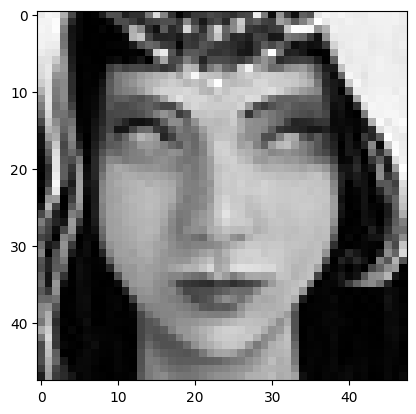

In [71]:
image = ''
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is" , pred_label)
plt.imshow(img.reshape(48,48), cmap='gray')

original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
model prediction is fear


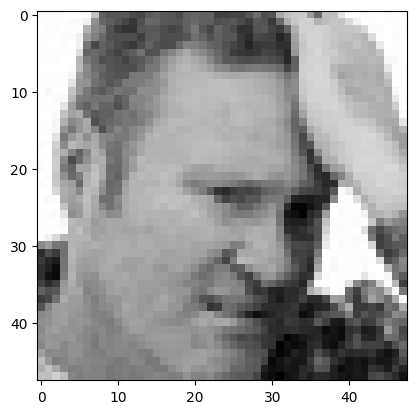

In [72]:
image = 'Face Emotion Recognition/images/images/train/fear/10072.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is" , pred_label)
plt.imshow(img.reshape(48,48), cmap='gray')

original image is of disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
model prediction is fear


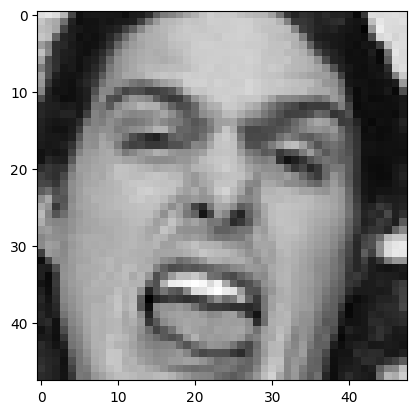

In [73]:
image = 'Face Emotion Recognition/images/images/train/disgust/11250.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is", pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
model prediction is fear


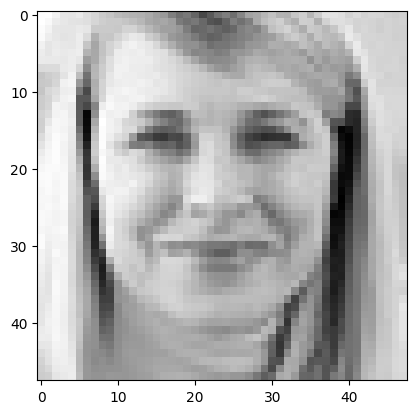

In [74]:
image = 'Face Emotion Recognition/images/images/train/happy/10039.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is", pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image isof surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
model prediction is  fear


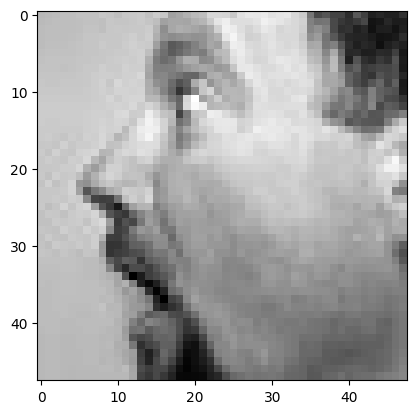

In [75]:
image = 'Face Emotion Recognition/images/images/train/surprise/9887.jpg'
print("original image isof surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')